SEGUNDO PROYECTO PERSONAL EN CIENCIA DE DATOS 
 Análisis del Mercado de Aguacates
 ## 🎯 Objetivos del análisis
 Explorar cómo varía el **precio promedio** según la temporada del año
 Evaluar la relación entre **precio y volumen vendido** (elasticidad de la demanda).
 Identificar qué **regiones** presentan los precios más altos y más bajos
 Analizar la participación de los distintos **tipos de empaque** en las ventas
 Detectar **patrones de consumo**  y escojer el mejor modelo para predicciones del precio  de los aguacates con nuevos resulados
 🚀 Utilidad empresarial
  Identificación de **regiones más rentables**
   📊 Entregables
   Visualizaciones interactivas de precios, demanda y tendencias
   Conclusiones sobre oportunidades de negocio en el mercado del aguacate
   

PASO 1: IMPORTAR LAS LIBRERIAS NECESARIAS
En este primer paso, se instalan  las librerías esenciales que permitirán realizar un modelo de machine learning arboles de decision para predecir el volumen de ventas en funcion de las demas caracteristicas. Estas incluyen herramientas para la manipulación y análisis de datos (pandas, numpy), visualización (matplotlib, seaborn) y modelado estadístico y de machine learning (scikit-learn). También se configura el estilo de las gráficas para mejorar la presentación visual de los resultados.

In [2]:
# primero instalamos las librerias a utilizar
%pip install matplotlib
%pip install scikit-learn
%pip install pandas 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from sklearn.metrics import mean_absolute_error

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


PASO 2: CARGAR EL DATASET DESDE GITHUB
En este paso se carga el conjunto de datos de ventas de aguacates  directamente desde un repositorio público en GitHub, utilizando la función read_csv de pandas. Esta fuente de datos real contiene variables demográficas, total de ventas por tipo de aguacate, precio promedio entre otras carateristicas  relevantes para el análisis, y se accede de forma local con archivo csv de nombre avocado.

In [3]:
# descargamos el data set avocado.csv y vemos que3 contiene
csv_file_path = "/Users/USUARIO/Desktop/avocado.csv"
df = pd.read_csv(csv_file_path)
print(df.head())
print(len(df))

   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015 

PASO 3: EXPLORACION INICIAL DE LOS DATOS
En esta etapa se realiza una inspección básica para comprender la estructura del dataset. Se utiliza df.info(), df.dtypes, df.describe para conocer el tipo de datos por  columna, el número de registros y la presencia de valores no nulos. Además, con df.isnull().sum() se identifican las columnas que contienen valores faltantes, que es importante para determinar que tipo de tranformacion y modelo aplicar a los datos para correcto procesamiento.


In [8]:
df.dtypes


Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [9]:
df.info

<bound method DataFrame.info of        Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13

In [10]:
df.describe()
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

PASO 4: VISUALIZACION DE LAS DISTRIBUCIONES DE PROBABILIDAD DE CADA UNA DE LAS CARACTERISTICAS
este paso genera una distribucion de la densidad de probabilidad en cada una de las variables, para saber cual es su forma y obervar si exsiten 
distribuciones con doble pico, valores atipicos o distriduciuones sesgadas que deben ser corregindas en la fase de procesamiento, usando sns.kdeplot() 

<Axes: xlabel='XLarge Bags', ylabel='Density'>

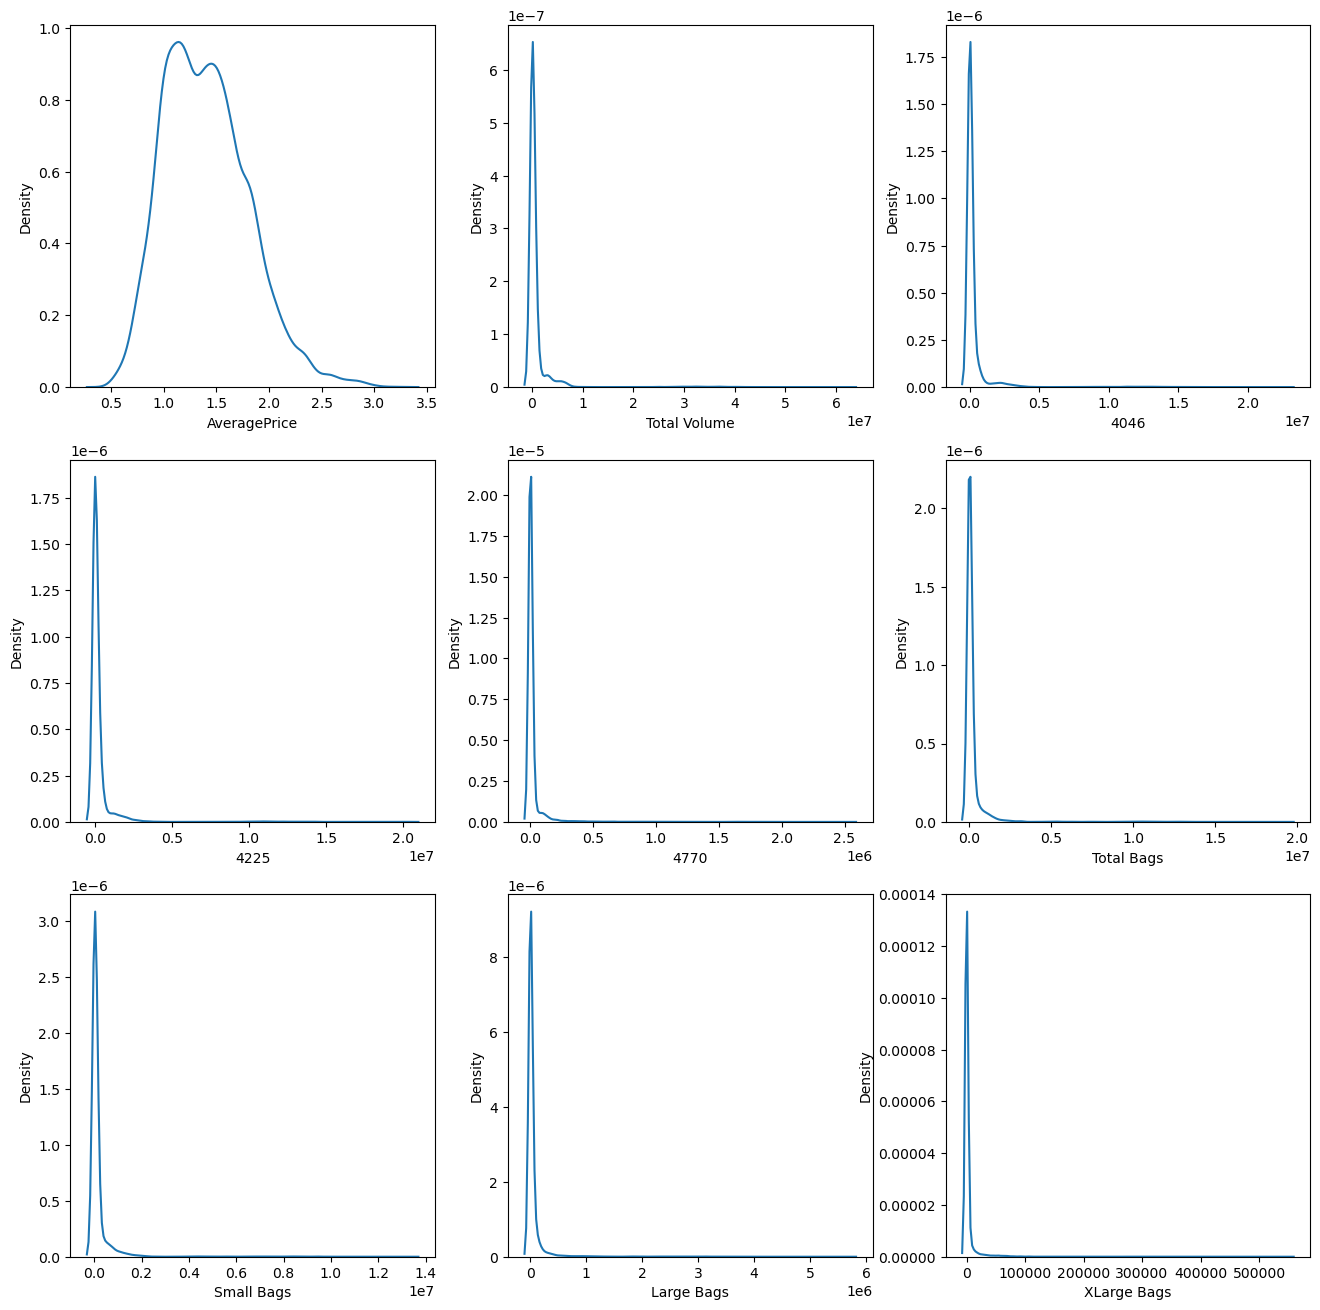

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
df.columns = df.columns.str.strip()
#f, axes = plt.subplots(3,3,figsize=(14,14)
fig, axes = plt.subplots(3, 3, figsize=(16, 16))
sns.kdeplot(df["AveragePrice"], ax = axes[0,0])
sns.kdeplot(df["Total Volume"], ax = axes[0,1])
sns.kdeplot(df["4046"], ax = axes[0,2])
sns.kdeplot(df["4225"], ax = axes[1,0])
sns.kdeplot(df["4770"], ax = axes[1,1])
sns.kdeplot(df["Total Bags"], ax = axes[1,2])
sns.kdeplot(df["Small Bags"], ax = axes[2,0])
sns.kdeplot(df["Large Bags"], ax = axes[2,1])
sns.kdeplot(df["XLarge Bags"], ax = axes[2,2])

En  este disgrama de densidad observamos que la funcion Avarageprice obedece muy bien a una distribucion gaussiana
para los datos , sin embargo las otras caracteristicas presentan un fuerte sesgo de los datos concentrdas en un pico muy pronunciada 
centrado en cero, ademas de observar que ls escarlas del dominio son diferentes, esto puede traesr problemas al momento de entrenar.

PASO 5: Matriz DE CORRELACION ENTRE VARIABLES NUMERICAS 
En este paso se genera un mapa de calor para visualizar las correlaciones entre las variables numéricas del dataset. Se utiliza la función corr() para calcular la matriz de correlación, y seaborn.heatmap para representar gráficamente los coeficientes de correlación, con anotaciones numéricas para facilitar la interpretación. Esta visualización es fundamental para identificar relaciones lineales fuertes entre variables predictoras y la variable objetivo, lo que ayuda a comprender mejor el comportamiento de los datos y a seleccionar características relevantes para el modelo, y asi podremos ver si nos eleiminmos ciertas caracteristicas antes de ser procesadas. 

Text(0.5, 1.0, 'Matriz de correlacion')

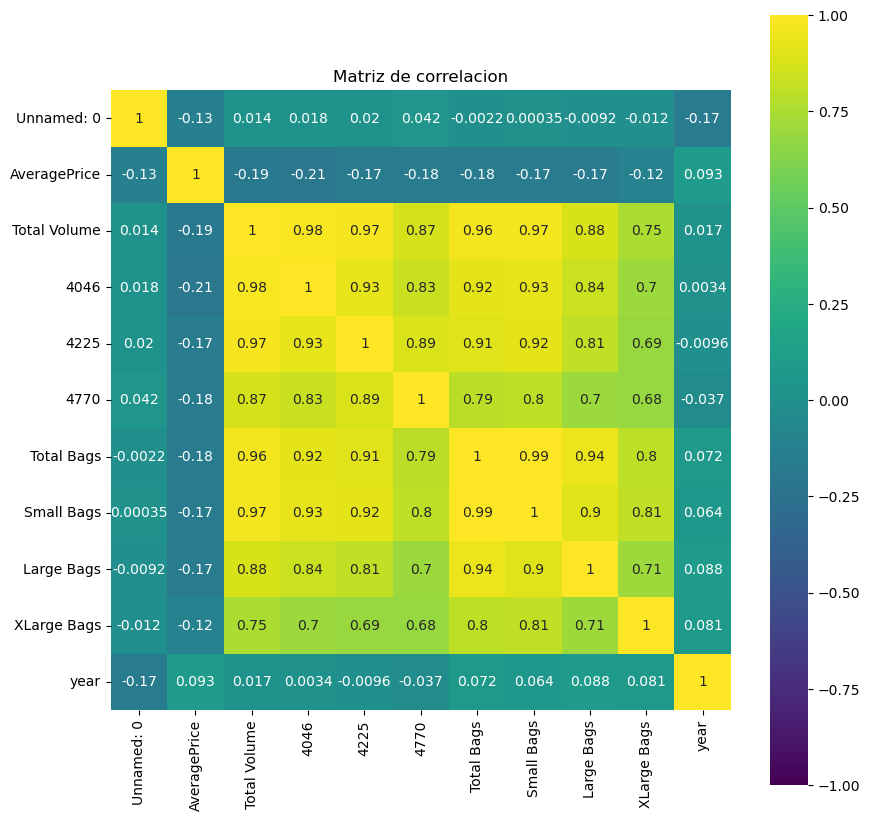

In [12]:

correlations = df.select_dtypes(include=["number"]).corr(method="pearson")
plt.figure(figsize=[10,10])
ax= sns.heatmap(correlations,vmin=-1,vmax=1,square=True,annot=True,cmap='viridis')
plt.title('Matriz de correlacion')


# D esta mapa de correlacion podemos observas qque las columnas, desconcocido, precio promedio y años
# no estan correlacionadas con las otras variables lo que nos hace sospechar que pueden ser variables a descartar en una
# posible fase de seleccion de mejores caracteristicas en el entrenamiento del modelo.- 


Paso 6: VISUALIZACION POR PARES 
En este paso utilizamos la funcion pariplot() par verificar si hay correrlaciones positivas o negativas entre nuestro conjunto de datos y asi, descartar las varibles ya sospechosas tales como precio pormedio y años de nuestro conjunto de datos.

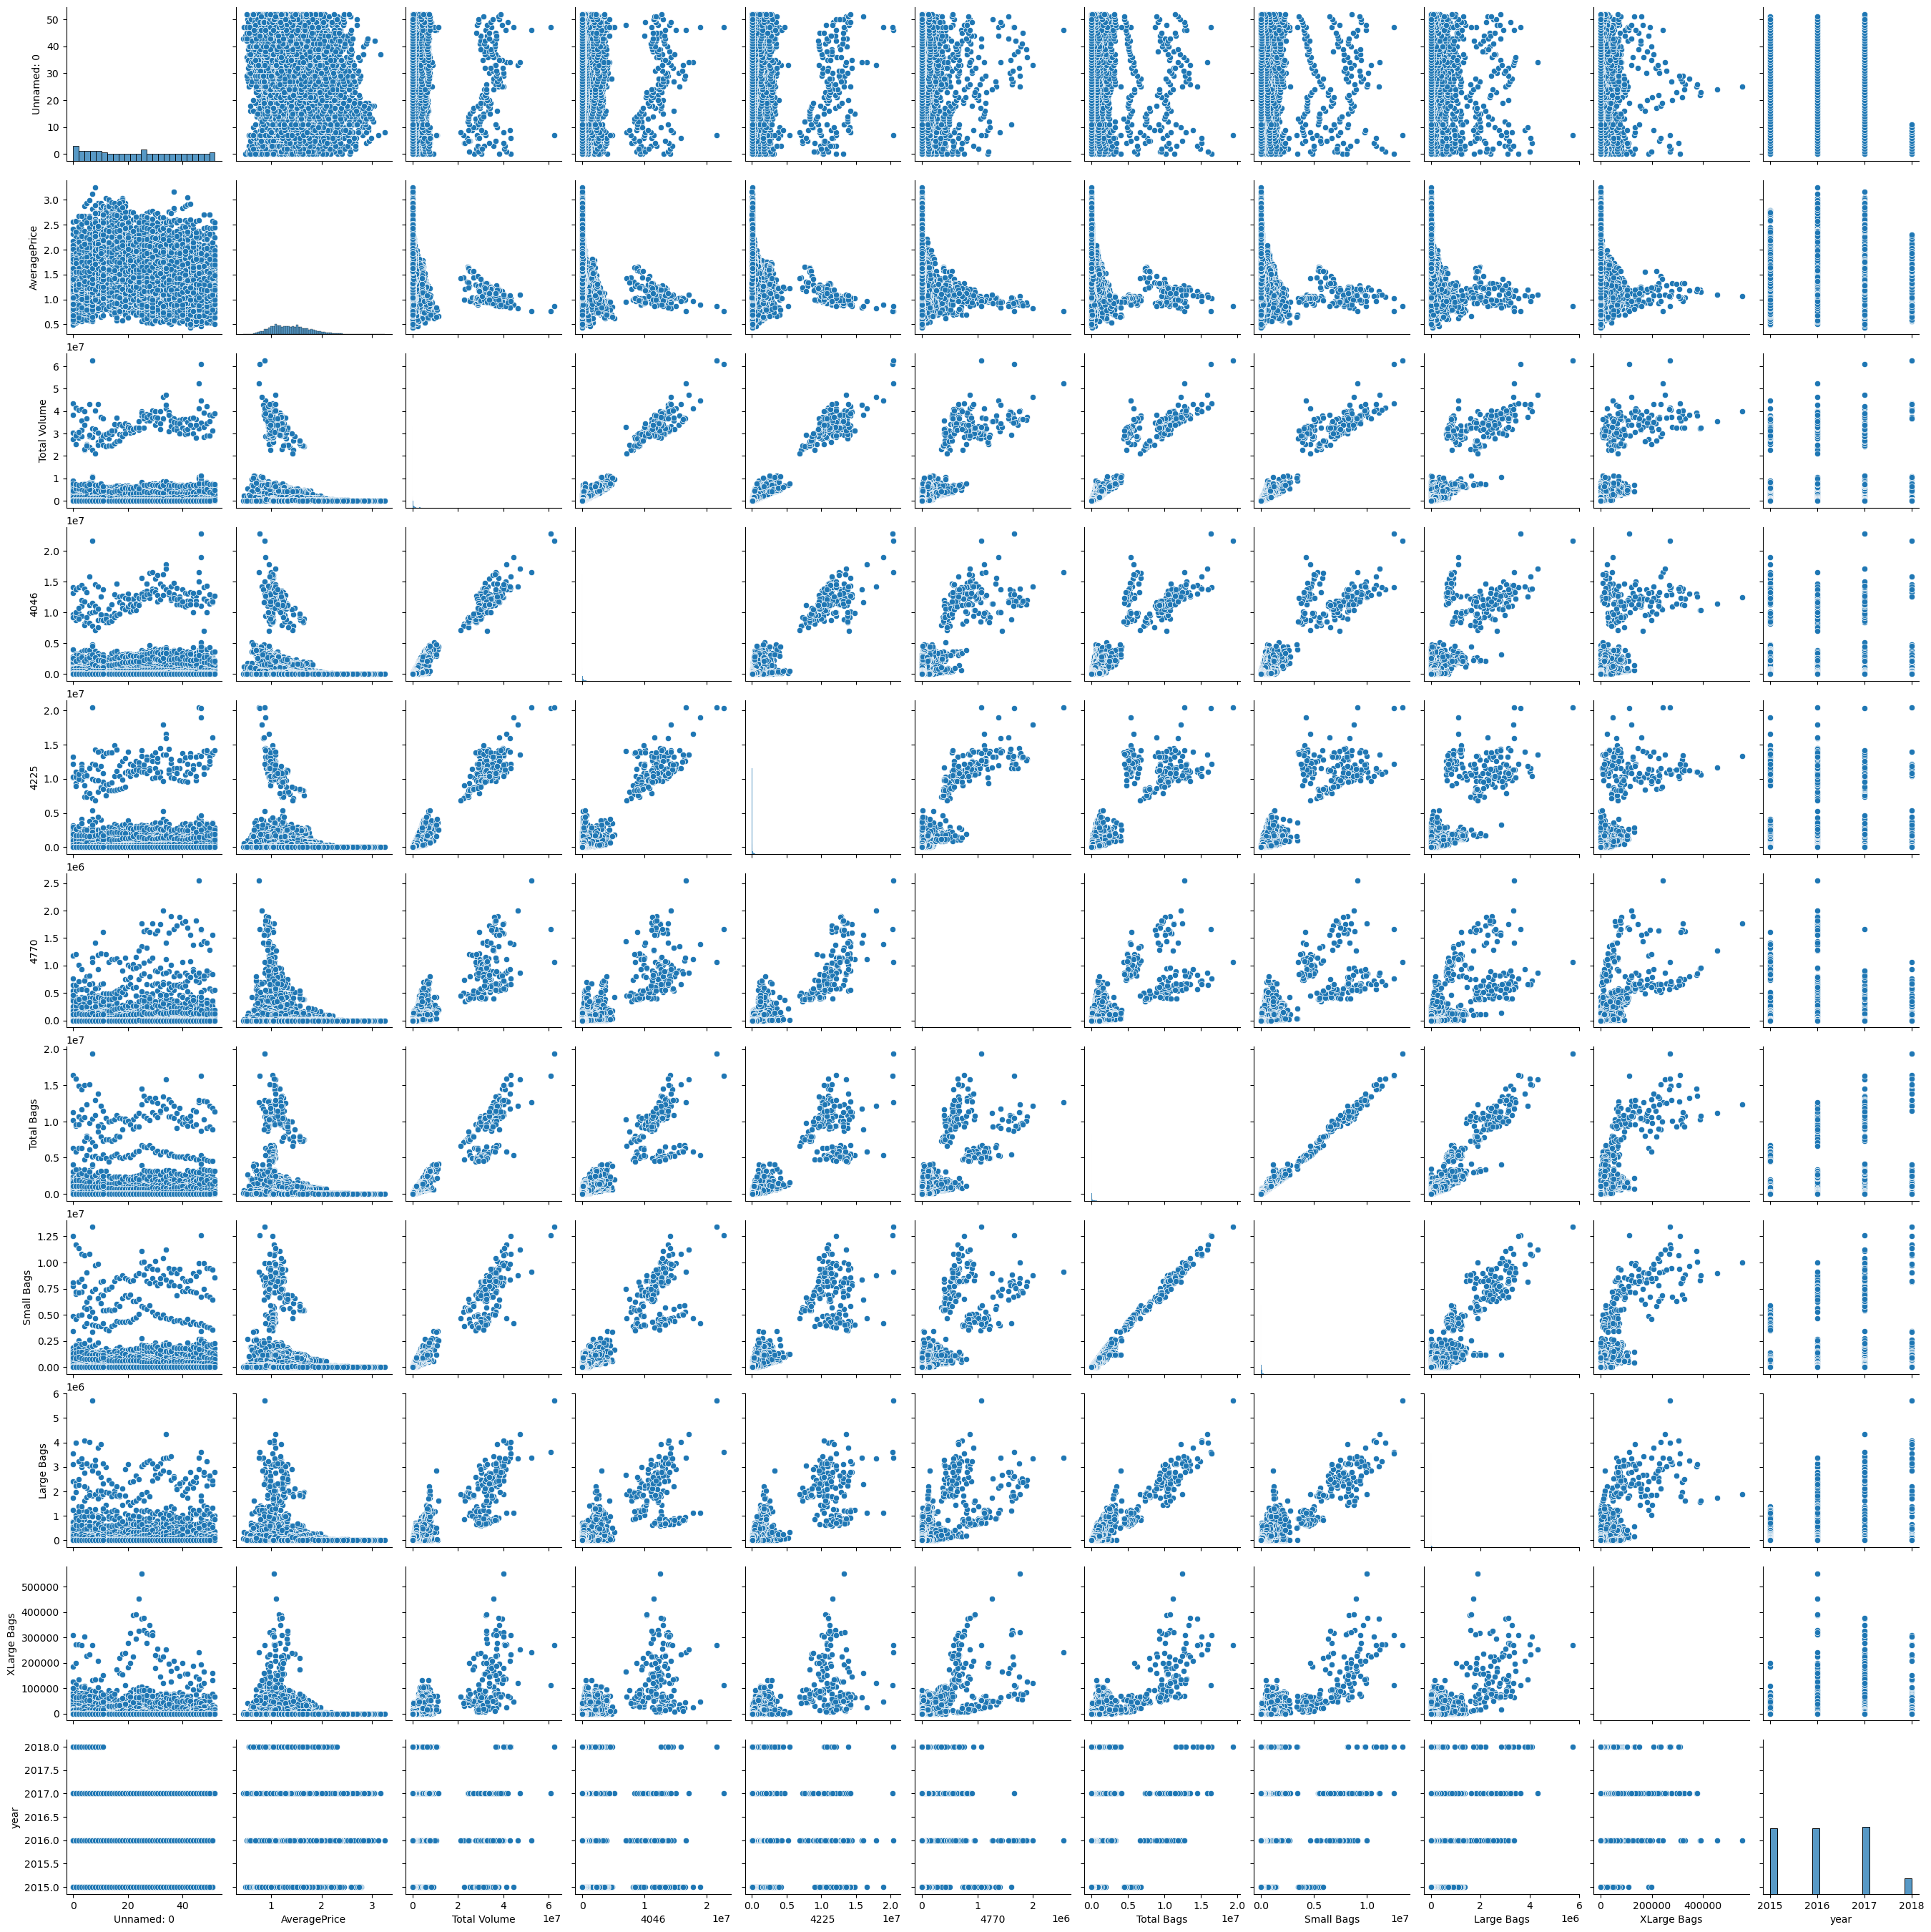

In [14]:
sns.pairplot(df)

# Al usar la funcion pariplot para ver la realacion entre variables 
# podemos observar lo mismo que el map de correlaciones observando que existe un fuerte correlacion positiva
# para todas las variables excepto las columas desconocido, precio promedio y aÑo.

# efectuando histogramas a cada una de las caracteristicas obvervamos que la maroyia no sigue ningun patron de distribucion
# de probnabilidad conocido, excepto el precio promedio que describe un districubion gaussiana siendo una caracteristic
# de buena calidad para un furto model ode entrenamiento.
# las demas varibles describien una barra con unos valores mucho mas pequeños que podriamos considerar outliers pero que se vera mas adelante en 
# un modelo de box-plot.

PASO 6: EMPEZAMOS A RESPONDER PREGUNTAS DEL MODELO DE NEGOCIO CON NUESTROS DATOS
•	¿Qué regiones tienen los precios más altos y cuáles los más bajos?


In [19]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
print(df['Date'].dtype)

datetime64[ns]


In [20]:
a=df["region"].unique()
print(a)
b=df["region"].nunique()
print(b)

['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'Syracuse'
 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico']
54


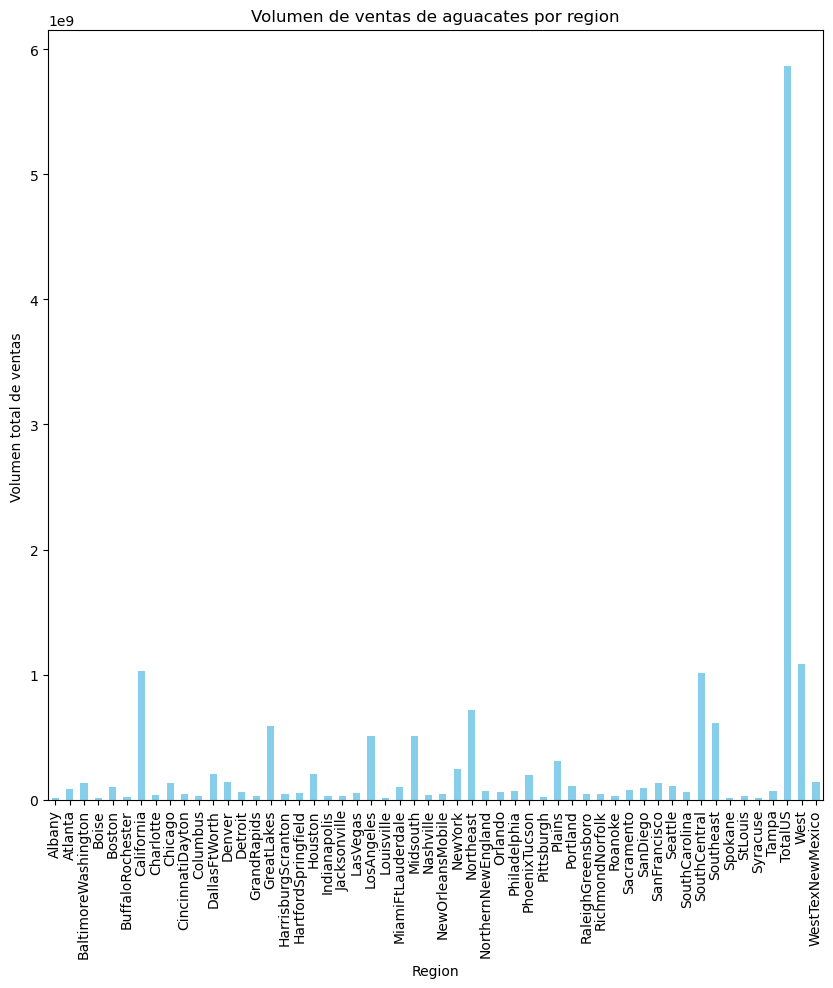

In [21]:

plt.figure(figsize=[10,10])
ventas_por_region = df.groupby("region")["Total Volume"].sum()
ventas_por_region.plot(kind="bar", color="skyblue")
plt.title('Volumen de ventas de aguacates por region')
plt.xlabel('Region')
plt.ylabel('Volumen total de ventas ')
plt.show()


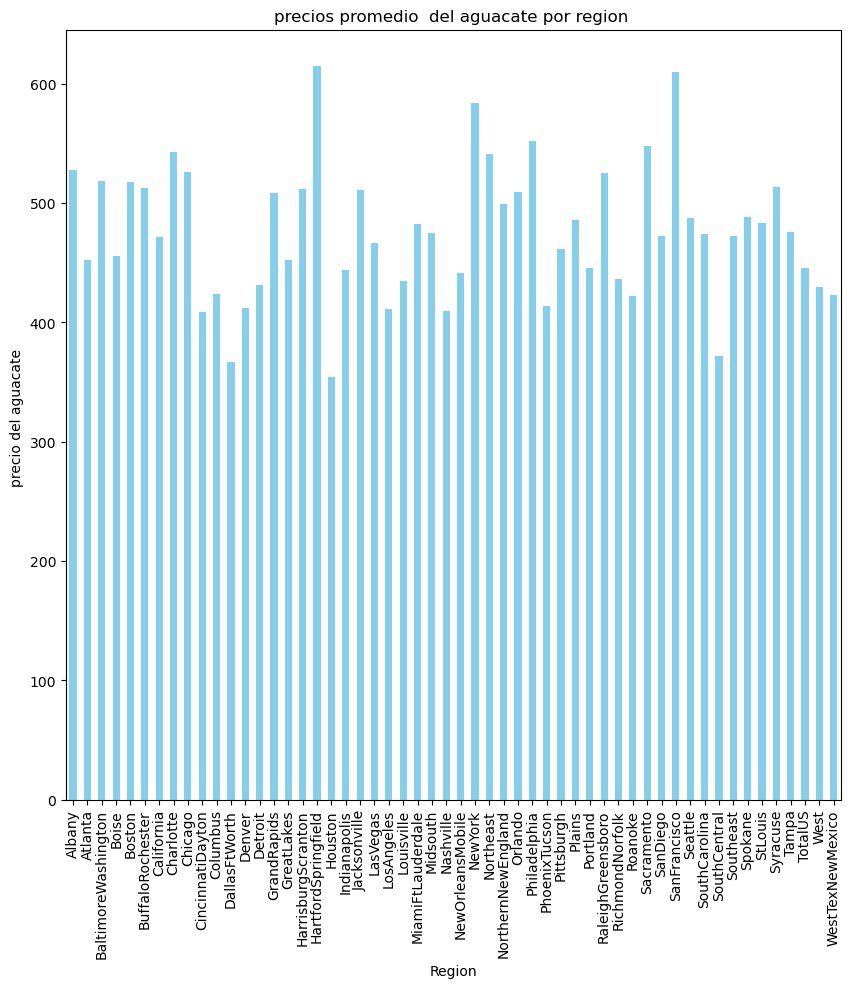

In [22]:
plt.figure(figsize=[10,10])
ventas_por_region = df.groupby("region")["AveragePrice"].sum()
ventas_por_region.plot(kind="bar", color="skyblue")
plt.title('precios promedio  del aguacate por region ')
plt.xlabel('Region')
plt.ylabel('precio del aguacate ')
plt.show()


En esta grafica podemos ver que los precios promedio por unidad de agucates,  no estan muy relacionados con lasc regiones se podria decir que los precios estan descorrelacionados con respecto a las localizacioens geograficas, y variando ligeremente entre los rangos de la suma total del precio promedio por region para el intervalo de tiempo de todo el dataset, viendo que las varibles oscilan entre 350$ hasta 600 $obteniendo el promedio en 450$ 

•¿Qué tipo de empaque (4046, 4225, 4770, bolsas pequeñas, grandes, XL) tiene mayor participación en ventas?

35.9558745365123 38.927902700631115 2.862230021896792 23.94231396169028 6.984072125181169 0.4149598782066462


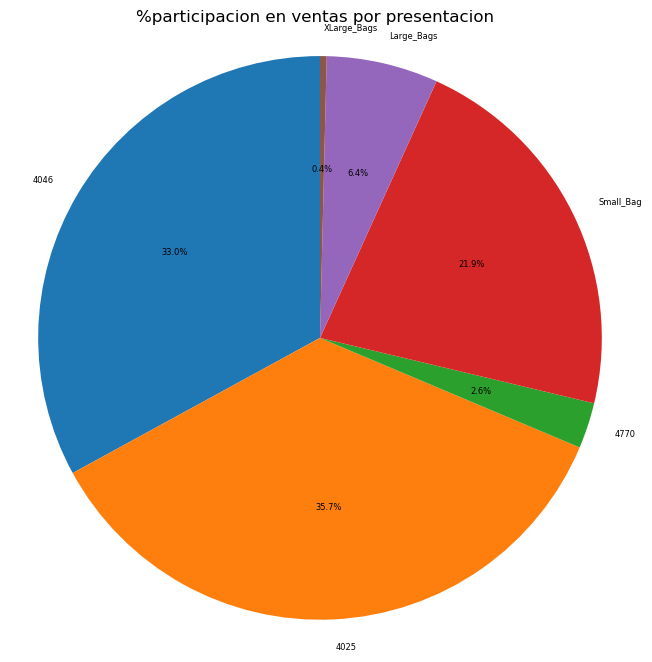

In [25]:

df['ventas_totales'] = df['AveragePrice'] * df['Total Volume']
df['ventas_4046']=df['4046']*df['AveragePrice']
df['ventas_4225']=df['4225']*df['AveragePrice']
df['ventas_4770']=df['4770']*df['AveragePrice']
df['ventas_Small_Bags']=df['Small Bags']*df['AveragePrice']
df['ventas_Large_Bags']=df['Large Bags']*df['AveragePrice']
df['ventas_XLarge_Bags']=df['XLarge Bags']*df['AveragePrice']
sumatoria_VOLUMEN_TOTAL=df['Total Volume'].sum()
sumatoria_4046=df['ventas_4046'].sum()
sumatoria_4225=df['ventas_4225'].sum()
sumatoria_4770=df['ventas_4770'].sum()
sumatoria_Small_Bags=df['ventas_Small_Bags'].sum()
sumatoria_Large_Bags=df['ventas_Large_Bags'].sum()
sumatoria_XLarge_Bags=df['ventas_XLarge_Bags'].sum() 
sumatoria_4046por=(sumatoria_4046*100)/sumatoria_VOLUMEN_TOTAL
sumatoria_4025por=(sumatoria_4225*100)/sumatoria_VOLUMEN_TOTAL
sumatoria_4770por=(sumatoria_4770*100)/sumatoria_VOLUMEN_TOTAL
sumatoria_Small_Bagspor=(sumatoria_Small_Bags*100)/sumatoria_VOLUMEN_TOTAL
sumatoria_Large_Bagspor=(sumatoria_Large_Bags*100)/sumatoria_VOLUMEN_TOTAL
sumatoria_XLarge_Bagspor=(sumatoria_XLarge_Bags*100)/sumatoria_VOLUMEN_TOTAL
array_por=[sumatoria_4046por,sumatoria_4025por,sumatoria_4770por,sumatoria_Small_Bagspor,sumatoria_Large_Bagspor,sumatoria_XLarge_Bagspor]
print(sumatoria_4046por,sumatoria_4025por,sumatoria_4770por,sumatoria_Small_Bagspor,sumatoria_Large_Bagspor,sumatoria_XLarge_Bagspor)
etiquetas=["4046","4025","4770","Small_Bag","Large_Bags","XLarge_Bags"]
plt.figure(figsize=(8, 8)) # Tamaño opcional
plt.pie(array_por, labels=etiquetas , autopct='%1.1f%%', textprops={'fontsize': 6}, startangle=90, shadow=False)
plt.title('%participacion en ventas por presentacion')
plt.axis('equal')
plt.show()


<Figure size 3000x3000 with 0 Axes>

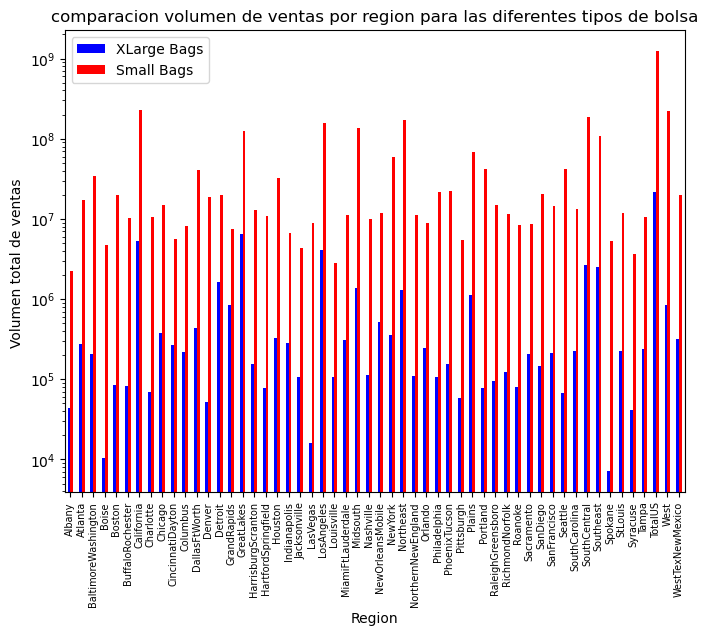

<bound method NDFrame.describe of        Unnamed: 0       Date  AveragePrice  Total Volume     4046       4225  \
0               0 2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1 2015-12-20          1.35      54876.98   674.28   44638.81   
2               2 2015-12-13          0.93     118220.22   794.70  109149.67   
3               3 2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4 2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...        ...           ...           ...      ...        ...   
18244           7 2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8 2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9 2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10 2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11 2018-01-07          1.62      17489.58  2894.77    2356.13   

     

In [26]:
df.describe()
plt.figure(figsize=[30,30])
ventas_por_region = df.groupby("region")["XLarge Bags"].sum()
ventas_por_region2 = df.groupby("region")["Small Bags"].sum()
df_agrupado = pd.DataFrame({'XLarge Bags':ventas_por_region, 'Small Bags':ventas_por_region2})
df_agrupado.plot(kind='bar', figsize=(8, 6), color=['blue', 'red'])
plt.yscale("log")
#ventas_por_region.plot(kind="bar", color="blue")
#ventas_por_region2.plot(kind="bar", color="red")
plt.title('comparacion volumen de ventas por region para las diferentes tipos de bolsa')
plt.xlabel('Region')
plt.xticks(fontsize=7)
plt.ylabel('Volumen total de ventas ')
plt.show()
df.describe

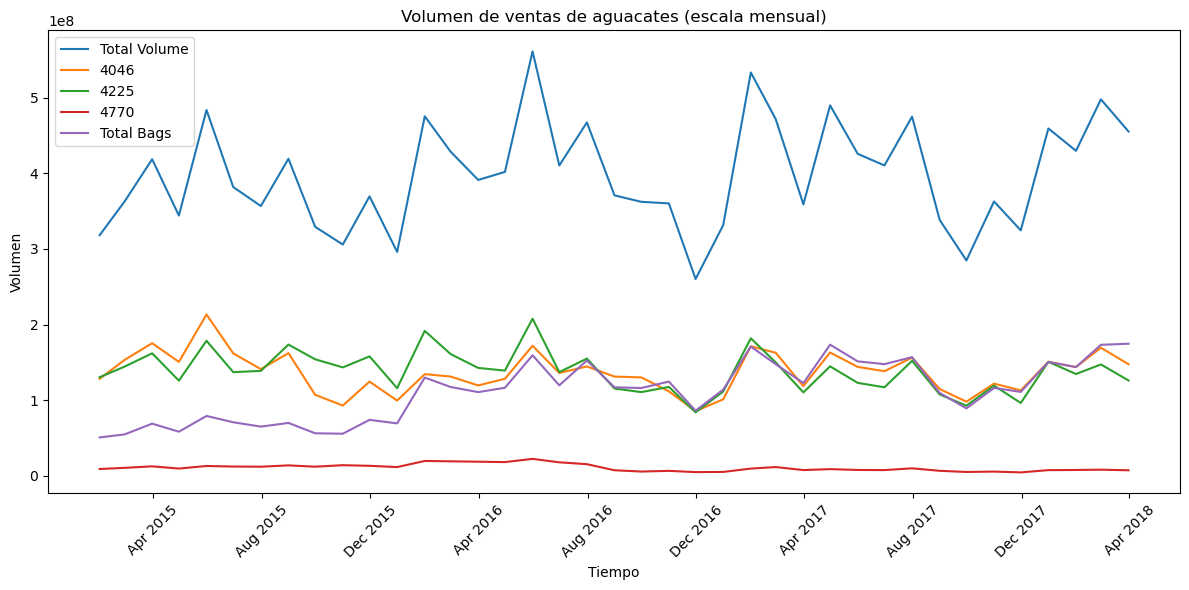

In [5]:

# Convertir a datetime y establecer como índice
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')  # ¡Esta línea es crucial!

# Resample solo las columnas numéricas
numeric_columns = ['Total Volume', '4046', '4225', '4770', 'Total Bags']
month = df[numeric_columns].resample('ME').sum()

# Crear la gráfica
plt.figure(figsize=(12,6))
plt.plot(month.index, month['Total Volume'], label='Total Volume')
plt.plot(month.index, month['4046'], label='4046')
plt.plot(month.index, month['4225'], label='4225')
plt.plot(month.index, month['4770'], label='4770')
plt.plot(month.index, month['Total Bags'], label='Total Bags')

plt.legend()
plt.title('Volumen de ventas de aguacates (escala mensual)')
plt.xlabel('Tiempo')
plt.ylabel('Volumen')

# Configurar formato de fechas
locator = mdates.MonthLocator(bymonth=[4, 8, 12]) 
formatter = mdates.DateFormatter('%b %Y')  # Agregué un espacio para mejor legibilidad
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

plt.xticks(rotation=45)  # Rotar etiquetas para mejor visualización
plt.tight_layout()  # Ajustar layout para que quepa todo
plt.show()

In [6]:
float_cols = df.select_dtypes(include=['float64'])
print(float_cols.head())

            AveragePrice  Total Volume     4046       4225    4770  \
Date                                                                 
2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

            Total Bags  Small Bags  Large Bags  XLarge Bags  
Date                                                         
2015-12-27     8696.87     8603.62       93.25          0.0  
2015-12-20     9505.56     9408.07       97.49          0.0  
2015-12-13     8145.35     8042.21      103.14          0.0  
2015-12-06     5811.16     5677.40      133.76          0.0  
2015-11-29     6183.95     5986.26      197.69          0.0  


In [16]:
names=['Total Volumn',
       '4046',
       '4225',
       '4770',
       'Total Bags',
       'Small Bags',
       'Large Bags',
       ' XLarge Bags',
       ]
array=df.values
X1=array[:,2:10]
Y1=array[:,6]

Trainnig: 1.0
Test: 1.0


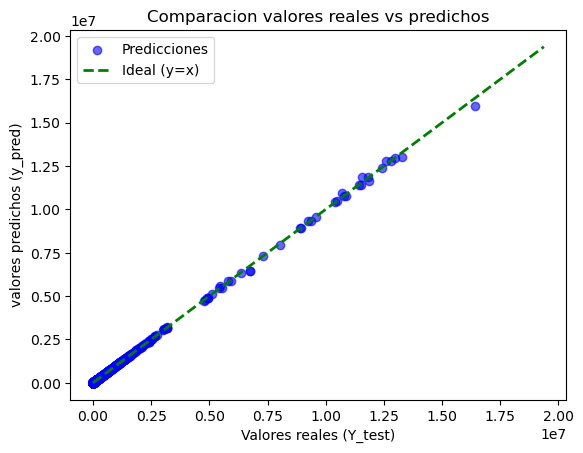

In [21]:

X_train, X_test,Y_train,Y_test = train_test_split(X1,Y1,test_size=0.2, random_state=7)
depth =4
tree =DecisionTreeRegressor(criterion='squared_error',max_depth=None)
tree.fit(X_train,Y_train)
print(f"Trainnig: {round(tree.score(X_train, Y_train),2)}")
print(f"Test: {round(tree.score(X_test,Y_test),2)}")
y_pred=tree.predict(X_test)
plt.scatter(Y_test, y_pred, color="blue", alpha=0.6, label="Predicciones")
plt.plot([Y1.min(), Y1.max()], [Y1.min(), Y1.max()], 'g--', lw=2, label="Ideal (y=x)")
plt.xlabel("Valores reales (Y_test)")
plt.ylabel("valores predichos (y_pred)")
plt.title("Comparacion valores reales vs predichos")
plt.legend()
plt.show()




MSE por fold: [0.99984637 0.99962486 0.99944222 0.99692064 0.99984281 0.99957516
 0.99522518]


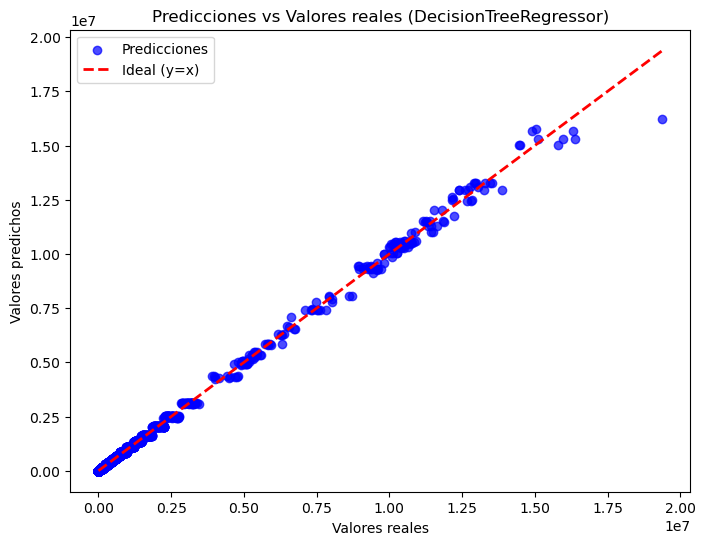

In [20]:
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
import numpy as np

kfold= KFold(n_splits=7, shuffle=True, random_state=7)
depth=5
model=DecisionTreeRegressor(criterion='squared_error',max_depth=depth)
results = cross_val_score(model,X1,Y1,cv=kfold )
print("MSE por fold:", scores)
a=np.mean(results)
y_pred = cross_val_predict(model, X1, Y1, cv=kfold)
plt.figure(figsize=(8,6))
plt.scatter(Y1, y_pred, alpha=0.7, color="blue", label="Predicciones")
plt.plot([Y1.min(), Y1.max()], [Y1.min(), Y1.max()], 'r--', lw=2, label="Ideal (y=x)")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Predicciones vs Valores reales (DecisionTreeRegressor)")
plt.legend()
plt.show()



Conclusiones

    El modelo de Arboles de decision  aplicado logró capturar relaciones significativas entre las características y el volumen total de ventas de aguacates .

    La evaluación mediante MSE y R² mostró un desempeño aceptable, aunque existen márgenes para mejorar mediante modelos más complejos o ingeniería de variables.

    La interpretación de los coeficientes permitió identificar cuáles variables tienen mayor impacto en el valor de las viviendas, facilitando insights relevantes para la toma de decisiones.

    Las visualizaciones dinámicas y estáticas aportaron claridad en la comprensión del ajuste del modelo y en la distribución de errores, evidenciando que el modelo no presenta sesgos sistemáticos graves.

En conjunto, este análisis constituye una base sólida para profundizar en modelos predictivos más avanzados y aplicar técnicas adicionales para optimizar la predicción de precios inmobiliarios.
